In [2]:
import os
from PIL import Image
import numpy as np


In [2]:

# Initialize the lists to store the images and labels
images = []
labels = []

path = "/Users/jvelasquez/Virginia_Tech/Spring_2023/ECE_4806/pedestal_svm/pedestal_pictures_raspicam"

# Loop over the image directories and load the images
for label, folder in enumerate(os.listdir(path)):
    folder_path = os.path.join(path, folder)

    # SKip the .DS_Store file
    if folder == ".DS_Store":
        continue

    # Assign label
    if "up" in folder:
        label = 1
    elif "side" in folder:
        label = 0
    else:
        print("Error parsing folders, check folder names")
        exit()

    for filename in os.listdir(folder_path):

        
        file_path = os.path.join(folder_path, filename)
        image = Image.open(file_path)

        # Downscale the image, maintaining the aspect ratio
        image.thumbnail((160, 160))
        
        if image.size != (160, 120):
            # Rotate the image on its side
            image = image.rotate(90, expand=True)
        
        # Print the image shape
        if image.size != (160, 120):
            print(image.size)

        # Reshape the array so that channels are first
        image = np.array(image).transpose(2, 0, 1)

        # Append the image and label to the lists
        images.append(image)
        labels.append(label)


# Convert the images and labels to numpy arrays
images = np.array(images)
labels = np.array(labels)

print(np.count_nonzero(labels == 5))
print(np.count_nonzero(labels == 4))
print(np.count_nonzero(labels == 3))
print(np.count_nonzero(labels == 2))
print(np.count_nonzero(labels == 1))
print(np.count_nonzero(labels == 0))


print(images.shape)
print(labels.shape)

# Save the images and labels to an npz file
np.savez_compressed("upright_fallen_dataset_v6.npz", images=images, labels=labels)



1500
1500
(3000, 3, 120, 160)
(3000,)


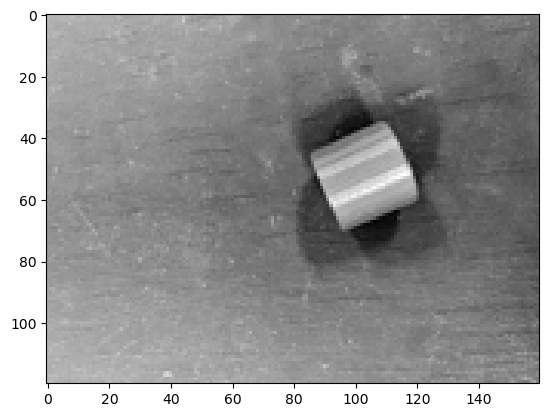

In [8]:
# Show the first image in the dataset
import matplotlib.pyplot as plt
plt.imshow(images[0], cmap="gray")

In [2]:
# Initialize the lists to store the images and labels
images = []
labels = []

# Loop over the image directories and load the images
for label, folder in enumerate(os.listdir(path)):
    folder_path = os.path.join(path, folder)

    # SKip the .DS_Store file
    if folder == ".DS_Store":
        continue

    for filename in os.listdir(folder_path):

        # Assign a unique label to each color in the folder name (red, green, white)
        if "red" in folder:
            label = 0
        elif "green" in folder:
            label = 1
        else:
            label = 2
        
        file_path = os.path.join(folder_path, filename)
        image = Image.open(file_path)

        # Downscale the image, maintaining the aspect ratio
        image.thumbnail((640, 640))
        
        if image.size != (640, 480):
            # Rotate the image on its side
            image = image.rotate(90, expand=True)
        
        # Print the image shape
        if image.size != (640, 480):
            print(image.size)

        # Append the image and label to the lists
        images.append(np.array(image))
        labels.append(label)


# Convert the images and labels to numpy arrays
images = np.array(images)
labels = np.array(labels)

print(images.shape)
print(labels.shape)

# Save the images and labels to an npz file
np.savez_compressed("pedestal_color_dataset_v2.npz", images=images, labels=labels)



(1290, 480, 640, 3)
(1290,)


In [3]:
# Initialize the lists to store the images and labels
images = []
labels = [] # Labels will be one-hot encoded

path = "/Users/jvelasquez/Virginia_Tech/Spring_2023/ECE_4806/ieee-robotics-2023-code/src/jetson_code/pedestal_classification/pedestal_pictures_raspicam"

# Loop over the image directories and load the images
for label, folder in enumerate(os.listdir(path)):
    folder_path = os.path.join(path, folder)

    # SKip the .DS_Store file
    if folder == ".DS_Store":
        continue

    if "green" in folder and "side" in folder:
        label = 0
    elif "green" in folder and "up" in folder:
        label = 1
    elif "red" in folder and "side" in folder:
        label = 2
    elif "red" in folder and "up" in folder:
        label = 3
    elif "white" in folder and "side" in folder:
        label = 4
    elif "white" in folder and "up" in folder:
        label = 5
    else:
        print("Error parsing folders, check folder names")
        exit()


    for filename in os.listdir(folder_path):

        # Assign a unique label to each color in the folder name (red, green, white)
        file_path = os.path.join(folder_path, filename)
        image = Image.open(file_path)

        # Downscale the image, maintaining the aspect ratio
        image.thumbnail((160, 160))
        
        if image.size != (160, 120):
            # Rotate the image on its side
            image = image.rotate(90, expand=True)
        
        # Print the image shape
        if image.size != (160, 120):
            print(image.size)

        # Reshape the array so that channels are first
        image = np.array(image).transpose(2, 0, 1)

        # Append the image and label to the lists
        images.append(image)
        labels.append(label)


# Convert the images and labels to numpy arrays
images = np.array(images)
labels = np.array(labels)

print(np.count_nonzero(labels == 5))
print(np.count_nonzero(labels == 4))
print(np.count_nonzero(labels == 3))
print(np.count_nonzero(labels == 2))
print(np.count_nonzero(labels == 1))
print(np.count_nonzero(labels == 0))

print(images.shape)
print(labels.shape)

# Save the images and labels to an npz file
np.savez_compressed("pedestal_color_orientation_dataset.npz", images=images, labels=labels)



500
500
500
500
500
500
(3000, 3, 120, 160)
(3000,)
